## Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install -U scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier ,RandomForestClassifier ,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix
import warnings
warnings.filterwarnings('ignore')
from scipy.stats.mstats import winsorize
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
pd.set_option('display.max_columns',None)
import six
import sys
sys.modules['sklearn.externals.six'] = six

## Data Loading and Cleaning

### Load and Prepare dataset

In [5]:
# accessing to the folder where the file is stored
path = 'C:/Users/Abdullah/anaconda3/term-deposit-marketing-2020.csv'

# Load the dataframe
dataframe = pd.read_csv(path)

print('Shape of the data is: ',dataframe.shape)

dataframe.head()

Shape of the data is:  (40000, 14)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


## Check Numeric and Categorical Features

In [6]:
# IDENTIFYING NUMERICAL FEATURES

numeric_data = dataframe.select_dtypes(include=np.number)

# select_dtypes selects data with numeric features

numeric_col = numeric_data.columns

# we will store the numeric features in a variable

print("Numeric Features:")
print(numeric_data.head())
print("===="*20)

Numeric Features:
   age  balance  day  duration  campaign
0   58     2143    5       261         1
1   44       29    5       151         1
2   33        2    5        76         1
3   47     1506    5        92         1
4   33        1    5       198         1


In [7]:
# IDENTIFYING CATEGORICAL FEATURES
categorical_data = dataframe.select_dtypes(exclude=np.number) # we will exclude data with numeric features
categorical_col = categorical_data.columns

# we will store the categorical features in a variable


print("Categorical Features:")
print(categorical_data.head())
print("===="*20)

Categorical Features:
            job  marital  education default housing loan  contact month   y
0    management  married   tertiary      no     yes   no  unknown   may  no
1    technician   single  secondary      no     yes   no  unknown   may  no
2  entrepreneur  married  secondary      no     yes  yes  unknown   may  no
3   blue-collar  married    unknown      no     yes   no  unknown   may  no
4       unknown   single    unknown      no      no   no  unknown   may  no


In [8]:
# CHECK THE DATATYPES OF ALL COLUMNS:

print(dataframe.dtypes)

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
y            object
dtype: object


### Check Missing Data

In [9]:
# To identify the number of missing values in every feature

# Finding the total missing values and arranging them in ascending order
total = dataframe.isnull().sum()

# Converting the missing values in percentage
percent = (dataframe.isnull().sum()/dataframe.isnull().count())
print(percent)
dataframe.head()

age          0.0
job          0.0
marital      0.0
education    0.0
default      0.0
balance      0.0
housing      0.0
loan         0.0
contact      0.0
day          0.0
month        0.0
duration     0.0
campaign     0.0
y            0.0
dtype: float64


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no


### Dropping missing values

In [10]:
# dropping features having missing values more than 60%
dataframe = dataframe.drop((percent[percent > 0.6]).index,axis= 1)

# checking null values
print(dataframe.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
y            0
dtype: int64


### Fill null values in continuous features

In [11]:
# imputing missing values with mean

for column in numeric_col:
    mean = dataframe[column].mean()
    dataframe[column].fillna(mean,inplace = True)
    
#     imputing with median
#     for column in numeric_col:
#     mean = dataframe[column].median()
#     dataframe[column].fillna(mean,inpalce = True)

## Check for Class Imbalance

In [12]:
# we are finding the percentage of each class in the feature 'y'
class_values = (dataframe['y'].value_counts()/dataframe['y'].value_counts().sum())*100
print(class_values)

no     92.76
yes     7.24
Name: y, dtype: float64


## EDA & Data Visualizations

### Univariate analysis of Categorical columns

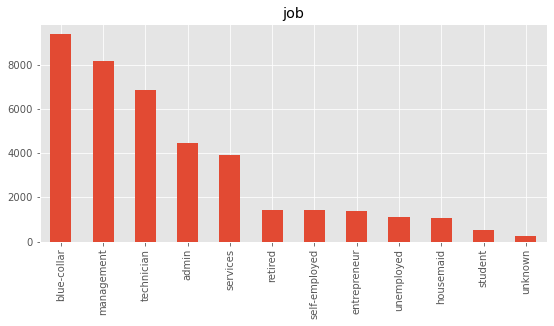

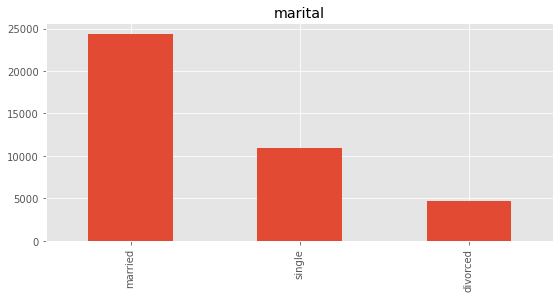

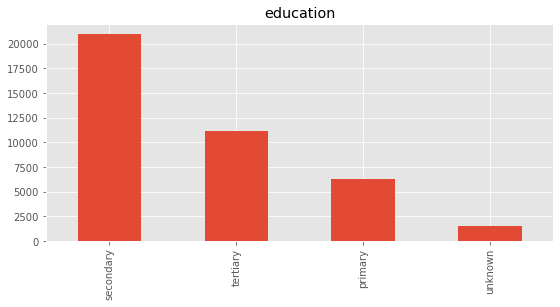

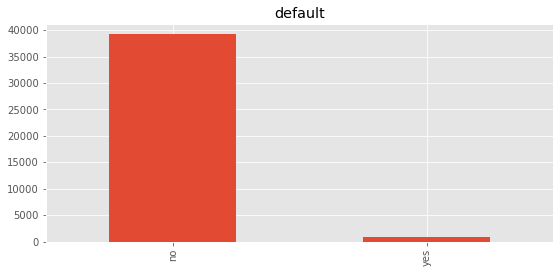

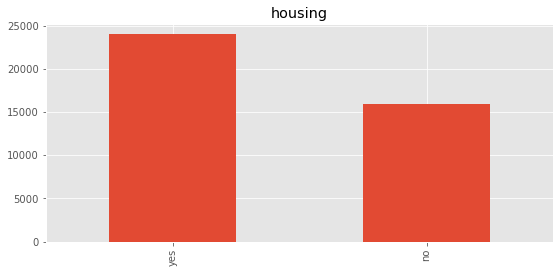

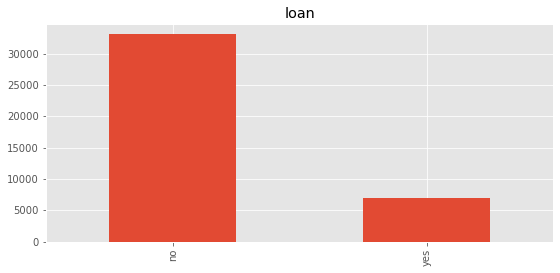

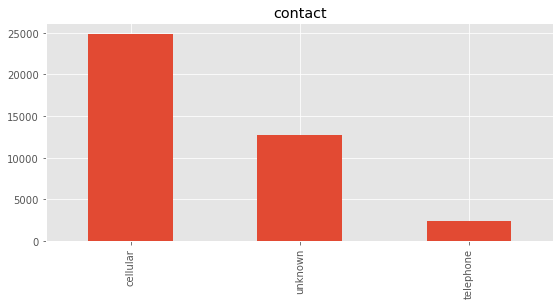

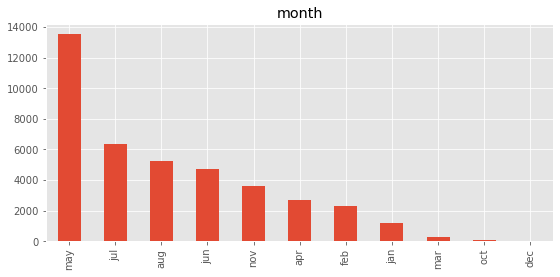

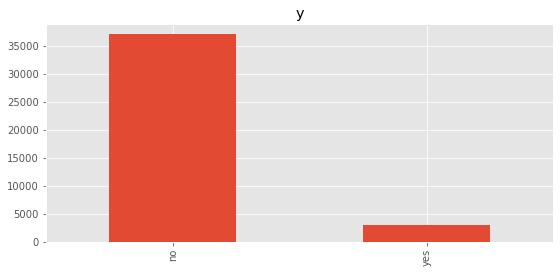

In [13]:
# Selecting the categorical columns
categorical_col = dataframe.select_dtypes(include=['object']).columns
plt.style.use('ggplot')
# Plotting a bar chart for each of the cateorical variable
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    dataframe[column].value_counts().plot(kind='bar')
    plt.title(column)

### Imputing unknown values of categorical columns

In [14]:
# Impute mising values of categorical data with mode
for column in categorical_col:
    mode = dataframe[column].mode()[0]
    dataframe[column] = dataframe[column].replace('unknown',mode)

### Univariate analysis of Continuous columns

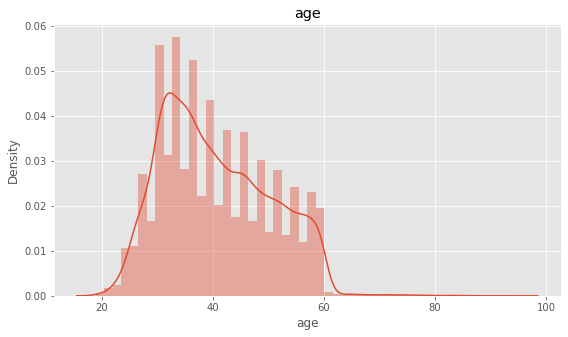

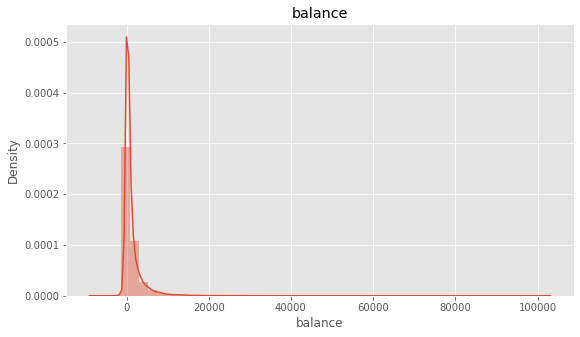

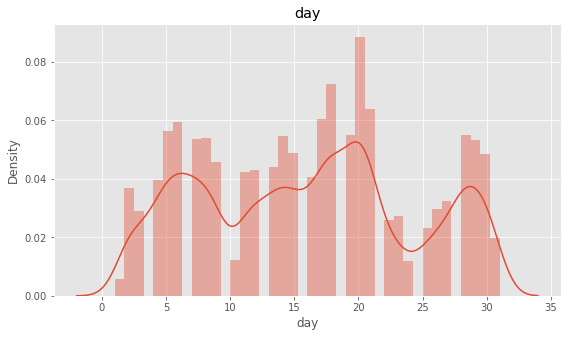

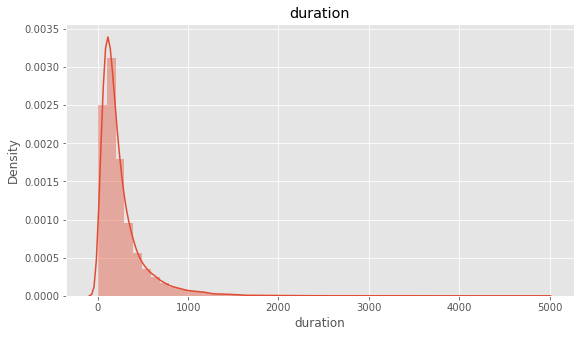

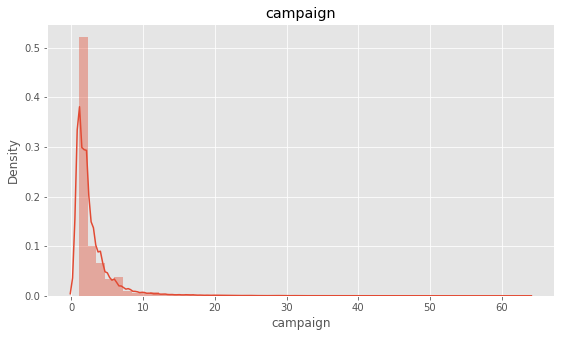

In [15]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(121)
    sns.distplot(dataframe[column])
    plt.title(column)

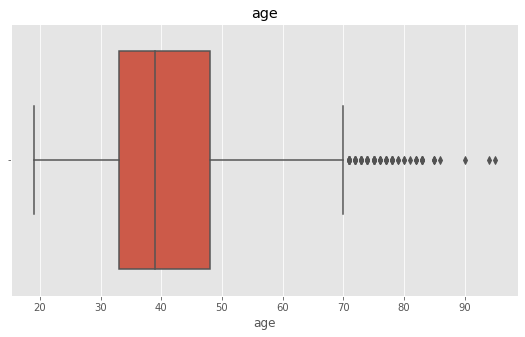

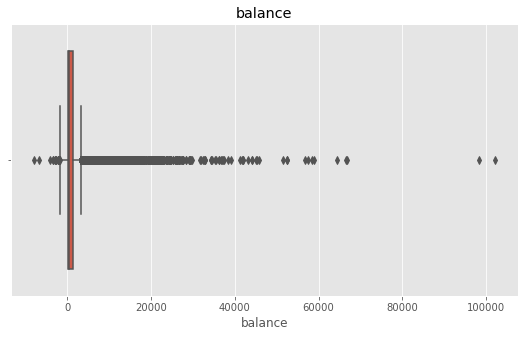

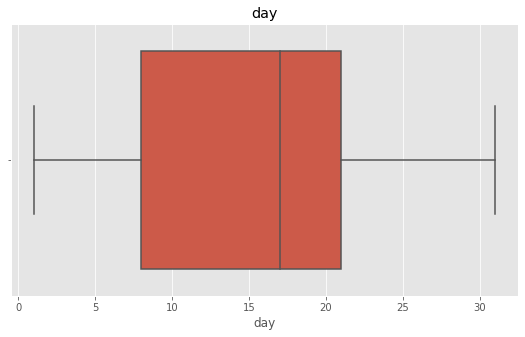

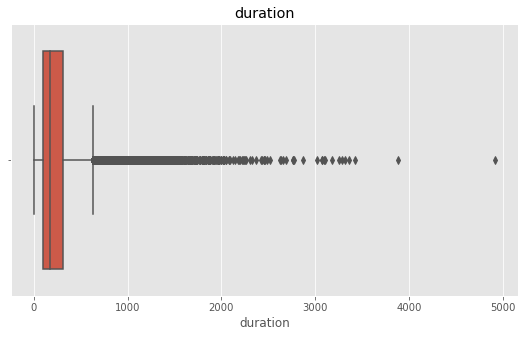

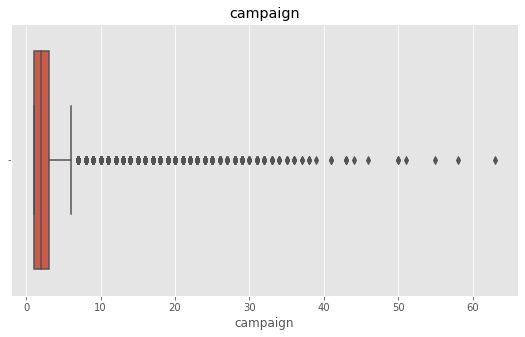

In [16]:
for column in numeric_col:
    plt.figure(figsize=(20,5))
    plt.subplot(122)
    sns.boxplot(dataframe[column])
    plt.title(column)

### Bivariate Analysis - Categorical Columns

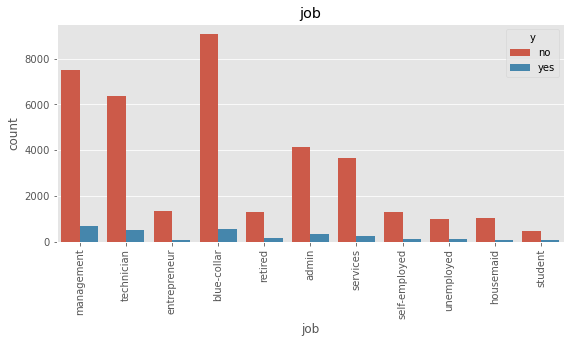

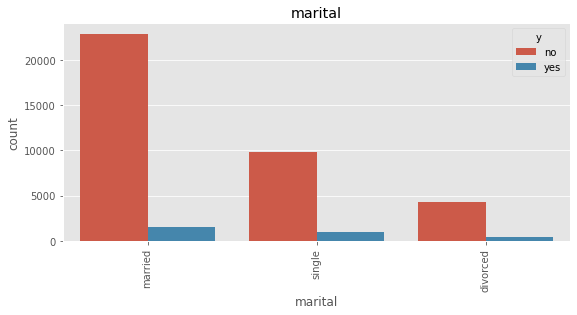

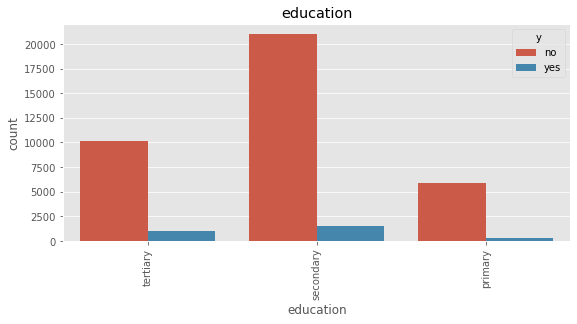

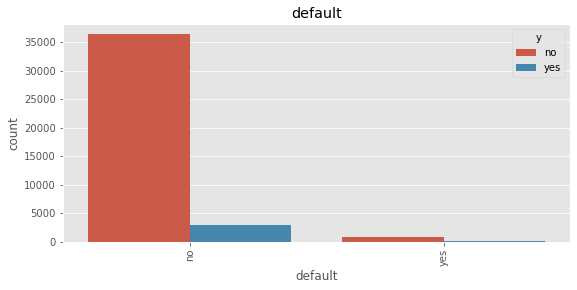

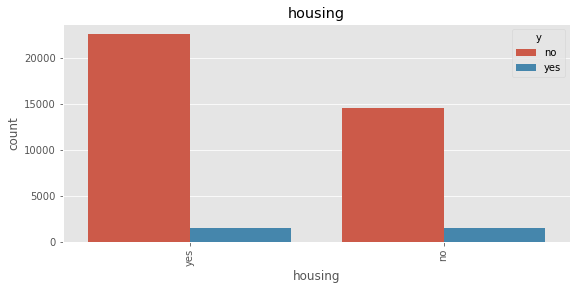

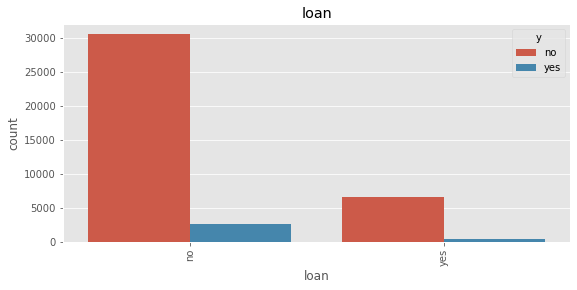

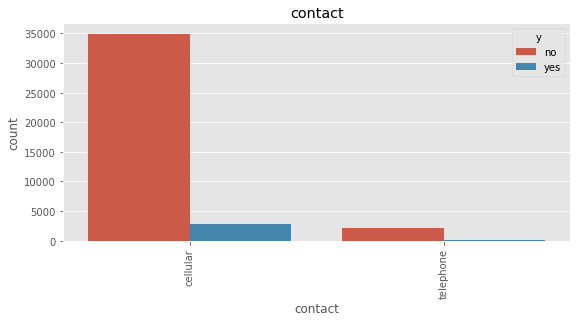

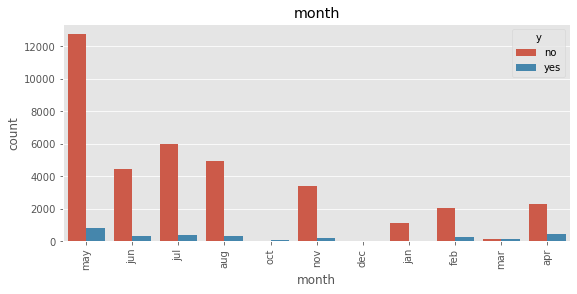

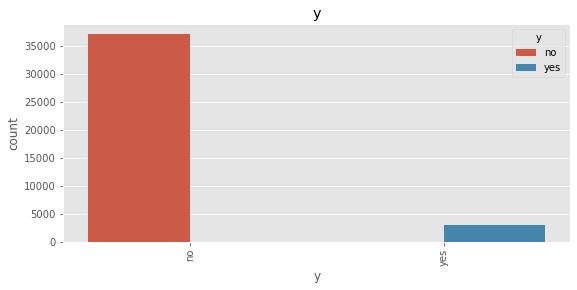

In [17]:
for column in categorical_col:
    plt.figure(figsize=(20,4))
    plt.subplot(121)
    sns.countplot(x=dataframe[column],hue=dataframe['y'],data=dataframe)
    plt.title(column)    
    plt.xticks(rotation=90)

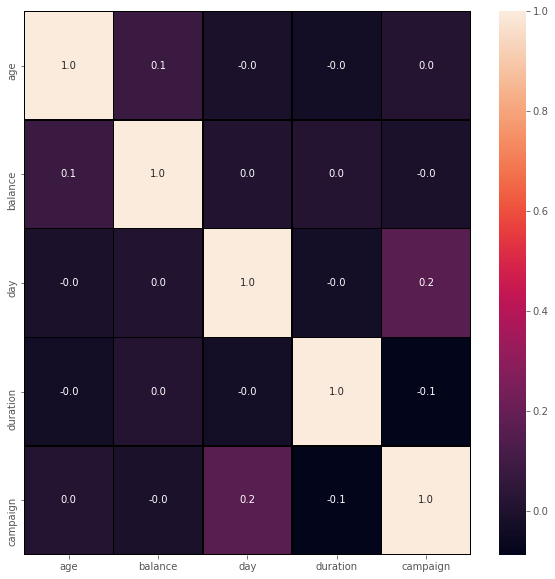

In [18]:
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(dataframe.corr(),annot=True,linewidths=0.5,linecolor="black",fmt=".1f",ax=ax)
plt.show()

#### Treating outliers in the continuous columns

In [19]:
numeric_col = dataframe.select_dtypes(include=np.number).columns

for col in numeric_col:    
    dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))

# Now run the code snippet to check outliers again

#### Label Encode Categorical variables

In [20]:
dataframe.to_csv(r'preprocessed_data.csv',index=False)